In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math

In [2]:
%matplotlib inline

import sys, os


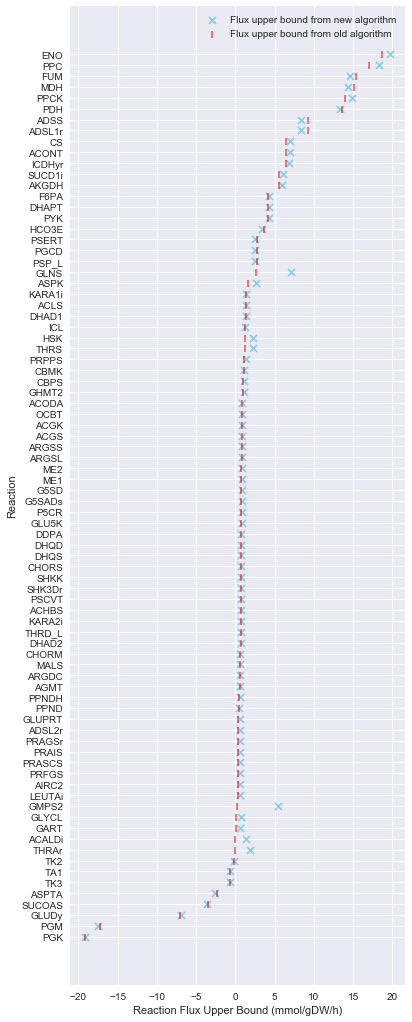

In [7]:
# Load the dataframe
df0 = pd.read_csv('test_data/oldLF2C-vs-newLF2C-hi-bound-v2.csv', sep=',', names= ['reaction','old', 'new'],skiprows=0)
df0['diff'] = (abs(df0['old'] - df0['new']))

#difference threshold delta, in mmol/gDW/hr
delta=0.01

#threshold for limit cycles removal
limit_cycle = 400

df = df0[(df0['diff'] > delta) & (df0['new'] < 400) & (df0['new'] > -400) & (df0['old'] < 400) & (df0['old'] > -400)]

# Initialize BIG figure
fig = plt.figure(1, [6, 18])   

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='old')
my_range=range(1,len(df.index)+1)
 
# Initialize BIG figure
fig = plt.figure(1, [6.7, 8])    
ax = fig.add_subplot(111)

# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
#plt.hlines(y=my_range, xmin=ordered_df['new'], xmax=(ordered_df['old']), color='grey', alpha=0.4)
plt.scatter(ordered_df['new'], my_range, color='skyblue', alpha=1, label='Flux upper bound from new algorithm',marker='x')
plt.scatter((ordered_df['old']), my_range, color='red', alpha=0.6 , label='Flux upper bound from old algorithm',marker='|')

plt.legend()
plt.yticks(my_range, ordered_df['reaction'])
plt.xlabel('Reaction Flux Upper Bound (mmol/gDW/h)')
plt.ylabel('Reaction')
plt.savefig("old-new-upper-bound.pdf", bbox_inches='tight')